<a href="https://colab.research.google.com/github/Lazy-Otto/UniversityWork/blob/main/Artificial_Intelligence_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow_datasets tensorflow_hub numpy matplotlib

In [ ]:
!pip install seaborn sklearn tensorflow_addons

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa

In [25]:
all_ds = tfds.load("eurosat", with_info=True)
train_ds = tfds.load("eurosat",split="train[:60%]")
test_ds = tfds.load("eurosat",split="train[60%:80%]")
validation_ds = tfds.load("eurosat",split="train[80%:]")

In [26]:
class_names = all_ds[1].features["label"].names
print(class_names)
num_classes = len(class_names)
print(num_classes, "classes")
num_examples = all_ds[1].splits["train"].num_examples
print(num_examples, "examples")

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
10 classes
27000 examples


In [ ]:
fig,ax = plt.subplots(1,1,figsize=(14,10))
label,counts = np.unique(np.fromiter(all_ds[0]["train"].map(lambda x: x["label"]), np.int32),return_counts=True)
plt.xlabel("Rótulo")
plt.ylabel("Quantidade")
sns.barplot(x=[class_names[l] for l in label], y=counts, ax=ax)
for i,x in enumerate(label):
  ax.text(x-0.2, counts[i]+5, counts[i])
ax.set_title("Gráfico de barras - amostra por classe")


In [33]:
def prepare_for_training(ds, cache=True, batch_size=64, shuffle_buffer_size=1000):
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()
  ds = ds.map(lambda d: (d["image"], tf.one_hot(d["label"], num_classes)))
  # shuffle the dataset
  ds = ds.shuffle(buffer_size=shuffle_buffer_size)
  # Repeat forever
  ds = ds.repeat()
  # split to batches
  ds = ds.batch(batch_size)
  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return ds

In [42]:
batch_size = 64

# conjuntos de treinamento e validação de pré-processamento
train_ds = prepare_for_training(train_ds, batch_size=batch_size)
valid_ds = prepare_for_training(valid_ds, batch_size=batch_size)

# validating shapes
for el in valid_ds.take(1):
  print(el[0].shape, el[1].shape)
for el in train_ds.take(1):
  print(el[0].shape, el[1].shape)



SyntaxError: ignored

KeyboardInterrupt: ignored

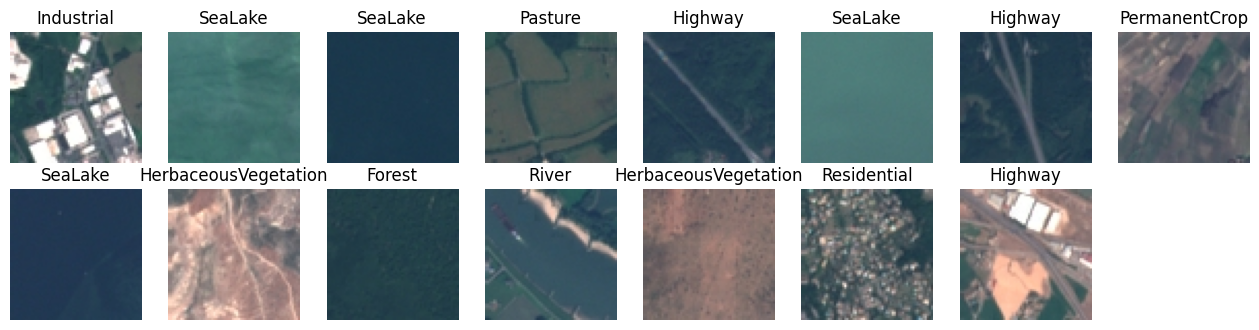

In [35]:
# primeiro lote do conjunto de treinamento
batch = next(iter(train_ds))

def show_batch(batch):
  plt.figure(figsize=(16, 16))
  for n in range(min(32, batch_size)):
      ax = plt.subplot(batch_size//8, 8, n + 1)
      # apresenta a imagem
      plt.imshow(batch[0][n])
      # coloque o rótulo correspondente como título na parte superior da imagem
      plt.title(class_names[tf.argmax(batch[1][n].numpy())])
      plt.axis('off')
      plt.savefig("sample-images.png")

# mostrando um lote de imagens junto com rótulos
show_batch(batch)